In [1]:
import engine as ng
import test_suite as tst

test = tst.Test2()
scheme = ng.MUSCL(test)
scheme.form = "Laney"
scheme.compute(scheme.tFinal)

c:\Users\Esther\Documents\Master PPF\C5\Smets\engine.py:165: RuntimeWarning: overflow encountered in scalar multiply
  flux[j] = f(w[j-1]) + .5*a[j-1]*(1 - self.nu*a[j-2]*Sj[j-1]*self.dx)/(1+ self.nu*(a[j-1]-a[j-2])) #backward space approximation for Sj
c:\Users\Esther\Documents\Master PPF\C5\Smets\engine.py:157: RuntimeWarning: invalid value encountered in scalar divide
  a[j]=(f(w[j+1])-f(w[j]))/(w[j+1]-w[j])
c:\Users\Esther\Documents\Master PPF\C5\Smets\engine.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  if arg * m <= 0:
c:\Users\Esther\Documents\Master PPF\C5\Smets\engine.py:180: RuntimeWarning: invalid value encountered in scalar divide
  a[j]=(f(w[j+1])-f(w[j]))/(w[j+1]-w[j])
c:\Users\Esther\Documents\Master PPF\C5\Smets\engine.py:268: RuntimeWarning: invalid value encountered in subtract
  u1w[2:-2] = u0w[2:-2] - self.nu * (F1w[2:-2] - F0w[2:-2]) # + 0.1*self.dt/self.dx/self.dx*Dw[2:-2]


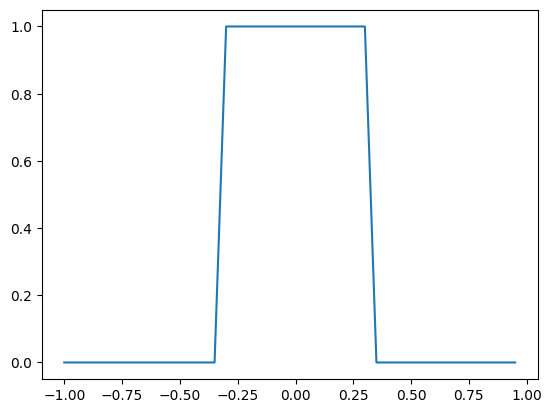

In [2]:
import matplotlib.pyplot as plt
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

In [3]:
## Diagnostics de performance

def diffAbs(uFinal,uRef):
	

SyntaxError: incomplete input (2612506321.py, line 4)